# Welcome to Trio de Informática's Second IART Project about Topic Modelling using NLP

Throughout this notebook one can observe the step by step data analysis of the training datasets as well as different approaches to this challenge. Several algorithms will also be implemented such as Naive Bayes, decision trees, SVM, etc. Be aware that different data processing techniques can match different algorithms, so in order to test all the combinations several cells will be provided to present all the results, as well as a comparison of accuracy of each implemented technique. 

The following notebook will record the group's approach to the proposed project, starting with the data analysis, followed by the data preprocessing. Afterwards, various algorithms will be implemented and a result comparison between different approaches will be performed.

# Statistical analysis

As one can observe when executing the code below, the provided dataset is composed of a table with several columns referring to different informations. Every entry in this dataset is identified by an ID, generated incrementally. Each entry contains a Title and an Abstract, reffering to a report/article to be classified as belonging to some topic. Each entry has an additional 6 columns related to topic classification. Each of these columns reffers to a topic: Computer Science, Physics, Mathematics, Statistics, Quantitative Biology and Quantitative Finance, and will contain a 1 if the article belongs to that said topic and a 0 otherwise.

In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Importing the dataset
train = pd.read_csv('archive/train.csv')

train.head()


,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [6]:

datasetCS = pd.DataFrame(train,
 columns=['ID', 'TITLE', 'ABSTRACT', 'Computer Science'])

datasetPhysics = pd.DataFrame(train,
 columns=['ID', 'TITLE', 'ABSTRACT', 'Physics'])

datasetMathematics = pd.DataFrame(train,
 columns=['ID', 'TITLE', 'ABSTRACT', 'Mathematics'])

datasetStatistics = pd.DataFrame(train,
 columns=['ID', 'TITLE', 'ABSTRACT', 'Statistics'])

datasetQBiology = pd.DataFrame(train,
 columns=['ID', 'TITLE', 'ABSTRACT', 'Quantitative Biology'])

datasetQFinance = pd.DataFrame(train,
 columns=['ID', 'TITLE', 'ABSTRACT', 'Quantitative Finance'])



## Size of the training dataset

It is important to know the magnitude of the dataset used to train the predictive model. Therefore, the following block of code will allow us to check the dimention of the used dataset. The bigger the dataset, the more data is taken into account when training the model, thus allowing it to acquire more information.

In [7]:
print("Train: Rows & Columns")
print(train.shape)

Train: Rows & Columns
(20972, 9)


## Training Dataset Info

By showing the info of the training dataset, one can see that there are no null values, meaning that there is no missing data. 

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


## Dataset description

Additionally, as shown below, the training dataset seems very clean because:

- Number of rows for all the data columns are same
- The max of all these 0-1 inputs is always 1
- The min and max value of the column ID match the expected values and so do the 25%, 50% and 75%, thus showing that the ID is incremented correctly


In [9]:
train.describe()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
count,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000
mean,10486.500000,0.409784,0.286716,0.267881,0.248236,0.027990,0.011873
std,6054.239259,0.491806,0.452238,0.442866,0.432000,0.164947,0.108317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5243.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10486.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15729.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,20972.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Topic Distribution

Each entry in the training dataset belongs to a topic. In order to evaluate the topics with the most and least entries, below is presented a numerical analysis where we can find the topic distribution of the training dataset. The model will classify more easily papers related to topics with the most entries in the training dataset, therefore the predictive model will be better trained to identify the more recurring topics of the training dataset.

In [10]:
print('Number of articles that belong the the topic:\n')
print('- Computer Science: ',train['Computer Science'].sum())
print('- Physics: ',train['Physics'].sum())
print('- Mathematics: ',train['Mathematics'].sum())
print('- Statistics: ',train['Statistics'].sum())
print('- Quantitative Biology: ',train['Quantitative Biology'].sum())
print('- Quantitative Finance: ',train['Quantitative Finance'].sum())

print('\nAs a percentage:\n')
print('- Computer Science: ',round(train['Computer Science'].sum()/train.shape[0]*100), '%')
print('- Physics: ',round(train['Physics'].sum()/train.shape[0]*100),'%')
print('- Mathematics: ',round(train['Mathematics'].sum()/train.shape[0]*100),'%')
print('- Statistics: ',round(train['Statistics'].sum()/train.shape[0]*100),'%')
print('- Quantitative Biology: ',round(train['Quantitative Biology'].sum()/train.shape[0]*100),'%')
print('- Quantitative Finance: ',round(train['Quantitative Finance'].sum()/train.shape[0]*100),'%')

Number of articles that belong the the topic:

- Computer Science:  8594
- Physics:  6013
- Mathematics:  5618
- Statistics:  5206
- Quantitative Biology:  587
- Quantitative Finance:  249

As a percentage:

- Computer Science:  41 %
- Physics:  29 %
- Mathematics:  27 %
- Statistics:  25 %
- Quantitative Biology:  3 %
- Quantitative Finance:  1 %


## Variable correlation

When analysing the heatmap, the categories that have the highest values are the ones that appear together the most, thus showing which two categories appear together the most: Statistics and Computer Science. 

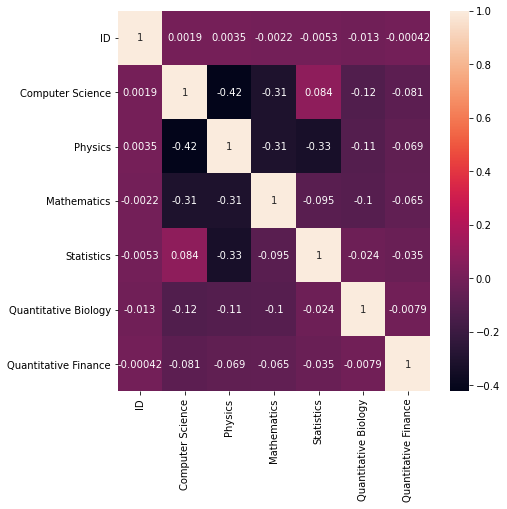

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

corrmat = train.corr()
f, ax = plt.subplots(figsize=(7, 7))
# Draw the heatmap using seaborn
sb.heatmap(corrmat, square=False, annot=True)
plt.show()

## Evaluation of the length distribution of Titles and Abstracts

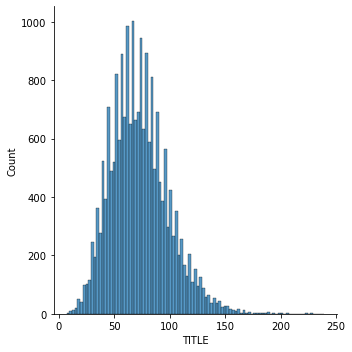

In [12]:
train_title_len = train['TITLE'].apply(len)
sb.displot(train_title_len)

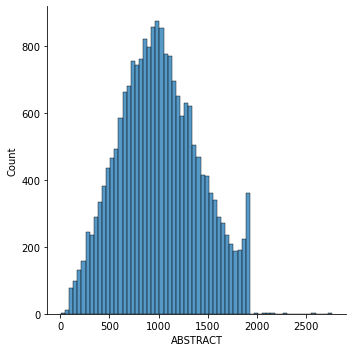

In [26]:
train_abstract_len = train['ABSTRACT'].apply(len)
sb.displot(train_abstract_len)

# Preprocessing Techniques

Be aware that each preprocessing technique applied includes some other steps such as: removing non-alphanumeric characters, lowercasing all words and tokenizing. After applying the preprocesing algorithm, there is an aditional step to remove all stopwords. After all this steps are completed, each preprocessing function returns the corpus, a structure composed of tuples encapsulating each preprocessed title-abstract pair.

## Porter Stemming

The Porter Stemming algorithm being the one of the oldest, originally developed in 1979, uses Suffix Stripping to produce stems. PorterStemmer is known for its simplicity and speed. It is commonly useful in Information Retrieval Environments known as IR Environments for fast recall and fetching of search queries. In a typical IR, environment documents are represented as vectors of words or terms. Words having the same stem will therefore have a similar meaning. 


In [13]:
from nltk.stem.porter import PorterStemmer

def porterStemming():

    corpus=[]
    # Initialize PorterStemmer
    ps = PorterStemmer()

    for i in range(0,train.shape[0]):
        # get title and abstract and remove non alpha chars
        title = re.sub('[^a-zA-Z]', ' ', train['TITLE'][i])
        abstract = re.sub('[^a-zA-Z]', ' ', train['ABSTRACT'][i])
        # to lower-case and tokenize
        title = title.lower().split()
        abstract = abstract.lower().split()
        # stemming and stop word removal
        title = ' '.join([ps.stem(w) for w in title if not w in set(stopwords.words('english'))])
        abstract = ' '.join([ps.stem(w) for w in abstract if not w in set(stopwords.words('english'))])
        corpus.append((title, abstract))

    return corpus

## Lancaster Stemming

Lancaster Stemming ( also known as Paice-Husk Stemmer) was developed in 1990 and uses a more aggressive approach than the Porter Stemming Algorithm and the Snowball Algorithm, although it is not as efficient as the latter. The LancasterStemmer (Paice-Husk stemmer) is an iterative algorithm with rules saved externally. On each iteration, it tries to find an applicable rule by the last character of the word. Each rule specifies either a deletion or replacement of an ending. If there is no such rule, it terminates. It also terminates if a word starts with a vowel and there are only two letters left or if a word starts with a consonant and there are only three characters left. Otherwise, the rule is applied, and the process repeats. LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur, specially on smaller words. Over-stemming causes the stems to be not linguistic, or they may have no meaning. 

In [14]:
from nltk.stem import LancasterStemmer

def lancasterStemming():

    corpus=[]
    # Initialize LancasterStemmer
    lc = LancasterStemmer()

    for i in range(0,train.shape[0]):
        # get title and abstract and remove non alpha chars
        title = re.sub('[^a-zA-Z]', ' ', train['TITLE'][i])
        abstract = re.sub('[^a-zA-Z]', ' ', train['ABSTRACT'][i])
        # to lower-case and tokenize
        title = title.lower().split()
        abstract = abstract.lower().split()
        # stemming and stop word removal
        title = ' '.join([lc.stem(w) for w in title if not w in set(stopwords.words('english'))])
        abstract = ' '.join([lc.stem(w) for w in abstract if not w in set(stopwords.words('english'))])
        corpus.append((title, abstract))
        
    return corpus

## Snowball Stemming

When compared to the Porter Stemmer, the Snowball Stemmer can map non-English words too. Since it supports other languages the Snowball Stemmers can be called a multi-lingual stemmer. This stemmer is based on a programming language called ‘Snowball’ that processes small strings and is the most widely used stemmer. The Snowball stemmer is way more aggressive than Porter Stemmer and is also referred to as Porter2 Stemmer. Because of the improvements added when compared to the Porter Stemmer, the Snowball stemmer has greater computational speed.

In [15]:
from nltk.stem.snowball import SnowballStemmer

def snowballStemming():

    corpus=[]
    # Initialize LancasterStemmer
    ss = SnowballStemmer(language='english')

    for i in range(0,train.shape[0]):
        # get title and abstract and remove non alpha chars
        title = re.sub('[^a-zA-Z]', ' ', train['TITLE'][i])
        abstract = re.sub('[^a-zA-Z]', ' ', train['ABSTRACT'][i])
        # to lower-case and tokenize
        title = title.lower().split()
        abstract = abstract.lower().split()
        # stemming and stop word removal
        title = ' '.join([ss.stem(w) for w in title if not w in set(stopwords.words('english'))])
        abstract = ' '.join([ss.stem(w) for w in abstract if not w in set(stopwords.words('english'))])
        corpus.append((title, abstract))

    return corpus

## Some comparisons on stemming algorithms

Difference Between Porter Stemmer and Snowball Stemmer:

- Snowball Stemmer is more aggressive than Porter Stemmer.
- Some issues in Porter Stemmer were fixed in Snowball Stemmer.
- There is only a little difference in the working of these two.
- Words like ‘fairly‘ and ‘sportingly‘ were stemmed to ‘fair’ and ‘sport’ in the snowball stemmer but when you use the porter stemmer they are stemmed to ‘fairli‘ and ‘sportingli‘.
- The difference between the two algorithms can be clearly seen in the way the word ‘Sportingly’ in stemmed by both. Clearly Snowball Stemmer stems it to a more accurate stem.

## Lemmatization

Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

In [16]:
from nltk.stem import WordNetLemmatizer

def lemmatization():
    corpus=[]
    # Initialize Word Net Lemmatizer
    lemm = WordNetLemmatizer()

    for i in range(0, train.shape[0]):
        # get title and abstract and remove non alpha chars
        title = re.sub('[^a-zA-Z]', ' ', train['TITLE'][i])
        abstract = re.sub('[^a-zA-Z]', ' ', train['ABSTRACT'][i])
        # to lower-case and tokenize
        title = title.lower().split()
        abstract = abstract.lower().split()
        # lemmatization and stop word removal
        title = ' '.join([lemm.lemmatize(w) for w in title if not w in set(stopwords.words('english'))])
        abstract = ' '.join([lemm.lemmatize(w) for w in abstract if not w in set(stopwords.words('english'))])
        corpus.append((title, abstract))
        
    return corpus

# Running the preprocessing algorithms

## Running Porter Stemming

In [68]:
start_time=time.time()
corpus1 = porterStemming()
print("Time took: %s seconds" % (time.time() - start_time))

Time took: 669.1881189346313 seconds


## Running Lancaster Stemming

In [69]:
start_time=time.time()
corpus1 = lancasterStemming()
print("Time took: %s seconds" % (time.time() - start_time))

Time took: 651.0373740196228 seconds


## Running Snowball Stemming

In [70]:
start_time=time.time()
corpus1 = snowballStemming()
print("Time took: %s seconds" % (time.time() - start_time))

Time took: 632.8341162204742 seconds


## Running Lemmatization

In [71]:
start_time=time.time()
corpus1 = lemmatization()
print("Time took: %s seconds" % (time.time() - start_time))

Time took: 610.1367080211639 seconds


To check the corpus produced by the preprocessing algorithm, run the code below.

In [81]:
print(corpus1)

y employed enable effective simulation problem involving complex geometry moving object rotorcraft paper present novel overset domain connectivity algorithm based upon direct cut approach suitable use gpu accelerated solver high order curved grid contrast previous method capable exploiting highly data parallel nature modern accelerator approach also substantially efficient handling curved grid arise within context high order method implementation new algorithm presented combined high order fluid dynamic code algorithm validated several benchmark problem including flow spinning golf ball reynolds number'), ('data assimilation algorithm paradigm leray alpha model turbulence', 'paper survey various implementation new data assimilation downscaling algorithm based spatial coarse mesh measurement paradigm demonstrate application algorithm leray alpha subgrid scale turbulence model importantly use paradigm show always necessary one collect coarse mesh measurement state variable involved under

# Stemming vs. Lemmatization

Stemming and Lemmatization are itself form of NLP and widely used in Text mining. Text Mining is the process of analysis of texts written in natural language and extract high-quality information from text. It involves looking for interesting patterns in the text or to extract data from the text to be inserted into a database. Developers have to prepare text using lexical analysis, POS (Parts-of-speech) tagging, stemming and other Natural Language Processing techniques to gain useful information from text.

### When should one use Stemming or Lemmatization?
Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.

Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, using WordNet corpus and a corpus for stop words as well to produce lemma, which makes it slower than stemming.

In stemming, a part of the word is just chopped off at the tail end to arrive at the stem of the word. There are definitely different algorithms used to find out how many characters have to be chopped off, but the algorithms don’t actually know the meaning of the word in the language it belongs to. In lemmatization, on the other hand, the algorithms have this knowledge. In fact, you can even say that these algorithms refer a dictionary to understand the meaning of the word before reducing it to its root word, or lemma.

A lemmatization algorithm would know that the word better is derived from the word good, and hence, the lemme is good. But a stemming algorithm wouldn’t be able to do the same. There could be over-stemming or under-stemming, and the word better could be reduced to either bet, or bett, or just retained as better. But there is no way in stemming that it could be reduced to its root word good. This, basically is the difference between stemming and lemmatization.

The above points show that if speed is the focus then stemming should be used since lemmatizers scan a corpus which consumes time and processing. It widely depends on the problem characteristics if stemmers should be used or lemmatizers.

### Pros of Stemming:
- Quicker and less complex than lemmatization.
- Requires less computational power and resources.

### Cons of Stemming:
- Issues of over stemming and under stemming may lead to not so meaningful or inappropriate stems.
- Stemming does not consider how the word is being used. For example – the word ‘saw‘ will be stemmed to ‘saw‘ itself but it won’t be considered whether the word is being used as a noun or a verb in the context. For this reason, Lemmatization is used as it keeps this fact in consideration and will return either ‘see’ or ‘saw’ depending on whether the word ‘saw’ was used as a verb or a noun.


### Pros of Lemmatization:

- The obvious advantage of lemmatization is that it is more accurate.
- When dealing with an NLP application such as a chat bot or a virtual assistant where understanding the meaning of the dialogue is crucial, lemmatization is useful.


### Cons of Lemmatization:

- Because lemmatization involves deriving the meaning of a word from something like a dictionary, it’s very time consuming.
- There is also a computation overhead for lemmatization.


# Bag-of-words


After forming the corpus, the bag-of-words model can be built!

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

def bagOfWords(corpus, category):
    # Create bag-of-words model
    data = []
    for (title, abstract) in corpus:
        data.append(title + abstract)

    vectorizer = CountVectorizer(max_features = 1500)
    X = vectorizer.fit_transform(data).toarray()
    if(category == 1):
        y = datasetCS.iloc[:,-1].values
    elif(category == 2):
        y = datasetPhysics.iloc[:,-1].values
    elif(category == 3):
        y = datasetMathematics.iloc[:,-1].values
    elif(category == 4):
        y = datasetStatistics.iloc[:,-1].values
    elif(category == 5):
        y = datasetQBiology.iloc[:,-1].values
    else:
        y = datasetQFinance.iloc[:,-1].values

    return X,y



# Splitting the training dataset 

In order to create a test dataset where the accuracy of the models can be evaluated, the training dataset must be split into a smaller training dataset and a test dataset, in order to compare the model predictions to the correct topic modelling answer.

In [18]:
# Split dataset into training and test sets
from sklearn.model_selection import train_test_split

def splittingDataset(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

    # print(X_train.shape, y_train.shape)
    # print(X_test.shape, y_test.shape)

    return X_train, X_test, y_train, y_test 

# Classifier Models

## SVM

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. SVMs are one of the most robust prediction methods, being based on statistical learning frameworks or VC theory. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [19]:
from sklearn.svm import SVC

def SVM(X_train, y_train, X_test):
    classifier = SVC()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    return y_pred


## Decision Trees

Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def decisionTree(X_train, y_train, X_test):
    classifier = DecisionTreeClassifier(min_samples_leaf=10)
    model = classifier.fit(X_train, y_train)

    tree.plot_tree(classifier) 

    y_pred = model.predict(X_test)

    return y_pred 


## Naïve Bayes

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object. It is mainly used in text classification that includes a high-dimensional training dataset. This algorithm is one of the simple and most effective classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [21]:
from sklearn.naive_bayes import GaussianNB

def naiveBayes(X_train, y_train, X_test):
    classifier = GaussianNB()
    model = classifier.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return y_pred

# Running the code


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

def evaluatePerformance(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('F1: ', f1_score(y_test, y_pred))

## Porter Stemming

In [101]:
start_time=time.time()
corpus = porterStemming()
print("Time took: %s seconds" % (time.time() - start_time))

Time took: 688.8998053073883 seconds


### SVM with Porter Stemming

In [102]:
# Computer Science Training
start_time=time.time()
X,y = bagOfWords(corpus, 1)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

X: 

[[0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]]
Y: 

[1 1 0 ... 1 0 0]
['abelian', 'abil', 'abl', 'absorpt', 'abstract', 'abund', 'acceler', 'accept', 'access', 'accord', 'account', 'accret', 'accur', 'accuraci', 'achiev', 'acoust', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'adapt', 'addit', 'address', 'adjust', 'admit', 'adopt', 'advanc', 'advantag', 'adversari', 'affect', 'affin', 'age', 'agent', 'aggreg', 'agn', 'agreement', 'aim', 'al', 'algebra', 'algorithm', 'align', 'alloc', 'allow', 'almost', 'along', 'alpha', 'alreadi', 'also', 'altern', 'although', 'alway', 'among', 'amount', 'amplitud', 'analog', 'analys', 'analysi', 'analyt', 'analyz', 'angl', 'angular', 'anisotrop', 'anisotropi', 'annot', 'anomali', 'anoth', 'answer', 'appear', 'appli', 'applic', 'approach', 'appropri', 'approxim', 'arbitrari', 'architectur', 'area', 'argu', 'argument', 'aris', 'arithmet', 'arm', 'around', 'array', 'art'

In [104]:
# Physics Training
start_time=time.time()
X,y = bagOfWords(corpus, 2)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2933   66]
 [ 250  946]]
Accuracy:  0.9246722288438617
Precision:  0.9347826086956522
Recall:  0.7909698996655519
F1:  0.8568840579710145
Time took: 381.61355090141296 seconds


In [105]:
# Mathematics Training
start_time=time.time()
X,y = bagOfWords(corpus, 3)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2966  154]
 [ 253  822]]
Accuracy:  0.902979737783075
Precision:  0.8422131147540983
Recall:  0.7646511627906977
F1:  0.8015602145294978
Time took: 304.0973958969116 seconds


In [106]:
# Statistics Training
start_time=time.time()
X,y = bagOfWords(corpus, 4)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2984  185]
 [ 321  705]]
Accuracy:  0.8793802145411204
Precision:  0.7921348314606742
Recall:  0.6871345029239766
F1:  0.7359081419624217
Time took: 459.6945171356201 seconds


In [107]:
# Quantitative Biology
start_time=time.time()
X,y = bagOfWords(corpus, 5)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[4078    1]
 [ 113    3]]
Accuracy:  0.9728247914183552
Precision:  0.75
Recall:  0.02586206896551724
F1:  0.05
Time took: 133.15859699249268 seconds


In [108]:
# Quantitative Finance
start_time=time.time()
X,y = bagOfWords(corpus, 6)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[4143    2]
 [  43    7]]
Accuracy:  0.9892729439809297
Precision:  0.7777777777777778
Recall:  0.14
F1:  0.23728813559322035
Time took: 52.21942973136902 seconds


 ### Decision Trees with Porter Stemming

In [109]:
# Computer Science Training
start_time=time.time()
X,y = bagOfWords(corpus, 1)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2044  407]
 [ 538 1206]]
Accuracy:  0.7747318235995232
Precision:  0.7476751394916304
Recall:  0.6915137614678899
F1:  0.7184986595174262
Time took: 17.416154146194458 seconds


In [110]:
# Physics Training
start_time=time.time()
X,y = bagOfWords(corpus, 2)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2791  208]
 [ 347  849]]
Accuracy:  0.867699642431466
Precision:  0.8032166508987701
Recall:  0.709866220735786
F1:  0.7536617842876164
Time took: 27.068933248519897 seconds


In [111]:
# Mathematics Training
start_time=time.time()
X,y = bagOfWords(corpus, 3)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2811  309]
 [ 391  684]]
Accuracy:  0.833134684147795
Precision:  0.6888217522658611
Recall:  0.6362790697674419
F1:  0.6615087040618955
Time took: 13.695836782455444 seconds


In [114]:
# Statistics Training
start_time=time.time()
X,y = bagOfWords(corpus, 4)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2822  347]
 [ 419  607]]
Accuracy:  0.8174016686531586
Precision:  0.6362683438155137
Recall:  0.5916179337231969
F1:  0.6131313131313132
Time took: 16.905641078948975 seconds


In [112]:
# Quantitative Biology Training
start_time=time.time()
X,y = bagOfWords(corpus, 5)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[4036   43]
 [ 101   15]]
Accuracy:  0.965673420738975
Precision:  0.25862068965517243
Recall:  0.12931034482758622
F1:  0.1724137931034483
Time took: 27.736650943756104 seconds


In [113]:
# Quantitative Finance Training
start_time=time.time()
X,y = bagOfWords(corpus, 6)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[4130   15]
 [  40   10]]
Accuracy:  0.9868891537544696
Precision:  0.4
Recall:  0.2
F1:  0.26666666666666666
Time took: 21.281198740005493 seconds


### Naive Bayes with Porter Stemming

In [115]:
# Computer Science Training
start_time=time.time()
X,y = bagOfWords(corpus, 1)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[1607  844]
 [ 143 1601]]
Accuracy:  0.7647199046483909
Precision:  0.6548057259713701
Recall:  0.9180045871559633
F1:  0.7643829076151826
Time took: 2.9679620265960693 seconds


In [116]:
# Physics Training
start_time=time.time()
X,y = bagOfWords(corpus, 2)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2745  254]
 [ 180 1016]]
Accuracy:  0.8965435041716329
Precision:  0.8
Recall:  0.8494983277591973
F1:  0.8240064882400648
Time took: 2.925236940383911 seconds


In [117]:
# Mathematics Training
start_time=time.time()
X,y = bagOfWords(corpus, 3)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2380  740]
 [ 110  965]]
Accuracy:  0.797377830750894
Precision:  0.5659824046920822
Recall:  0.8976744186046511
F1:  0.6942446043165468
Time took: 2.974050998687744 seconds


In [118]:
# Statistics Training
start_time=time.time()
X,y = bagOfWords(corpus, 4)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[1805 1364]
 [  84  942]]
Accuracy:  0.6548271752085817
Precision:  0.4084995663486557
Recall:  0.9181286549707602
F1:  0.5654261704681872
Time took: 3.1136720180511475 seconds


In [119]:
# Quantitative Biology Training
start_time=time.time()
X,y = bagOfWords(corpus, 5)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2605 1474]
 [  33   83]]
Accuracy:  0.6407628128724672
Precision:  0.05330764290301863
Recall:  0.7155172413793104
F1:  0.09922295277943814
Time took: 3.1860060691833496 seconds


In [120]:
# Quantitative Finance Training
start_time=time.time()
X,y = bagOfWords(corpus, 6)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[3744  401]
 [  26   24]]
Accuracy:  0.8982121573301549
Precision:  0.05647058823529412
Recall:  0.48
F1:  0.10105263157894737
Time took: 3.2327139377593994 seconds


## Lancaster Stemming

In [52]:
start_time=time.time()
corpus = lancasterStemming()
print("Time took: %s seconds" % (time.time() - start_time))


[[4143    2]
 [  44    6]]
Accuracy:  0.9890345649582837
Precision:  0.75
Recall:  0.12
F1:  0.20689655172413793
Time took: 971.7333130836487 seconds


### SVM with Lancaster Stemming

In [ ]:
# Computer Science Training
start_time=time.time()
X,y = bagOfWords(corpus, 1)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Physics Training
start_time=time.time()
X,y = bagOfWords(corpus, 2)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Mathematics Training
start_time=time.time()
X,y = bagOfWords(corpus, 3)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Statistics Training
start_time=time.time()
X,y = bagOfWords(corpus, 4)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Quantitative Biology Training
start_time=time.time()
X,y = bagOfWords(corpus, 5)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Quantitative Finance Training
start_time=time.time()
X,y = bagOfWords(corpus, 6)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

### Decision Trees with Lancaster Stemming

In [ ]:
# Computer Science Training
start_time=time.time()
X,y = bagOfWords(corpus, 1)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Physics Training
start_time=time.time()
X,y = bagOfWords(corpus, 2)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Mathematics Training
start_time=time.time()
X,y = bagOfWords(corpus, 3)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Statistics Training
start_time=time.time()
X,y = bagOfWords(corpus, 4)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Quantitative Biology Training
start_time=time.time()
X,y = bagOfWords(corpus, 5)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Quantitative Finance Training
start_time=time.time()
X,y = bagOfWords(corpus, 6)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

### Naive Bayes with Lancaster Stemming

In [ ]:
# Computer Science Training
start_time=time.time()
X,y = bagOfWords(corpus, 1)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Physics Training
start_time=time.time()
X,y = bagOfWords(corpus, 2)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Mathematics Training
start_time=time.time()
X,y = bagOfWords(corpus, 3)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Statistics Training
start_time=time.time()
X,y = bagOfWords(corpus, 4)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Quantitative Biology Training
start_time=time.time()
X,y = bagOfWords(corpus, 5)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

In [ ]:
# Quantitative Finance Training
start_time=time.time()
X,y = bagOfWords(corpus, 6)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

## Snowball Stemming

In [33]:
start_time=time.time()
corpus = snowballStemming()
print("Time took: %s seconds" % (time.time() - start_time))

Time took: 610.2219228744507 seconds


### SVM with Snowball Stemming

In [34]:
# Computer Science Training
start_time=time.time()
X,y = bagOfWords(corpus, 1)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2149  302]
 [ 253 1491]]
Accuracy:  0.867699642431466
Precision:  0.8315672058003346
Recall:  0.8549311926605505
F1:  0.8430873621713316
Time took: 549.0569069385529 seconds


In [35]:
# Physics Training
start_time=time.time()
X,y = bagOfWords(corpus, 2)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2930   69]
 [ 256  940]]
Accuracy:  0.9225268176400476
Precision:  0.931615460852329
Recall:  0.7859531772575251
F1:  0.8526077097505669
Time took: 331.6357567310333 seconds


In [36]:
# Mathematics Training
start_time=time.time()
X,y = bagOfWords(corpus, 3)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2965  155]
 [ 253  822]]
Accuracy:  0.902741358760429
Precision:  0.8413510747185261
Recall:  0.7646511627906977
F1:  0.8011695906432749
Time took: 289.3475921154022 seconds


In [37]:
# Statistics Training
start_time=time.time()
X,y = bagOfWords(corpus, 4)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2983  186]
 [ 323  703]]
Accuracy:  0.8786650774731823
Precision:  0.7907761529808774
Recall:  0.6851851851851852
F1:  0.7342036553524806
Time took: 442.2400677204132 seconds


In [38]:
# Quantitative Biology Training
start_time=time.time()
X,y = bagOfWords(corpus, 5)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[4078    1]
 [ 113    3]]
Accuracy:  0.9728247914183552
Precision:  0.75
Recall:  0.02586206896551724
F1:  0.05
Time took: 125.20574402809143 seconds


In [39]:
# Quantitative Finance Training
start_time=time.time()
X,y = bagOfWords(corpus, 6)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[4143    2]
 [  43    7]]
Accuracy:  0.9892729439809297
Precision:  0.7777777777777778
Recall:  0.14
F1:  0.23728813559322035
Time took: 51.95715880393982 seconds


### Decision Trees with Snowball Stemming

In [40]:
# Computer Science training
start_time=time.time()
X,y = bagOfWords(corpus, 1)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2030  421]
 [ 510 1234]]
Accuracy:  0.7780691299165673
Precision:  0.7456193353474321
Recall:  0.7075688073394495
F1:  0.72609591056193
Time took: 16.29105305671692 seconds


In [41]:
# Physics training
start_time=time.time()
X,y = bagOfWords(corpus, 2)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2787  212]
 [ 351  845]]
Accuracy:  0.865792610250298
Precision:  0.7994323557237465
Recall:  0.7065217391304348
F1:  0.7501109631602307
Time took: 24.699506044387817 seconds


In [42]:
# Mathematics training
start_time=time.time()
X,y = bagOfWords(corpus, 3)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2830  290]
 [ 391  684]]
Accuracy:  0.8376638855780691
Precision:  0.702258726899384
Recall:  0.6362790697674419
F1:  0.6676427525622254
Time took: 14.038932085037231 seconds


In [43]:
# Statistics training
start_time=time.time()
X,y = bagOfWords(corpus, 4)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2819  350]
 [ 433  593]]
Accuracy:  0.8133492252681764
Precision:  0.6288441145281018
Recall:  0.5779727095516569
F1:  0.6023362112747588
Time took: 16.806960105895996 seconds


In [44]:
# Quantitative Biology training
start_time=time.time()
X,y = bagOfWords(corpus, 5)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[4039   40]
 [  97   19]]
Accuracy:  0.967342073897497
Precision:  0.3220338983050847
Recall:  0.16379310344827586
F1:  0.21714285714285714
Time took: 29.35352897644043 seconds


In [45]:
# Quantitative Finance training
start_time=time.time()
X,y = bagOfWords(corpus, 6)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[4133   12]
 [  42    8]]
Accuracy:  0.9871275327771156
Precision:  0.4
Recall:  0.16
F1:  0.22857142857142856
Time took: 21.618927001953125 seconds


### Naive Bayes with Snowball Stemminh

In [46]:
# Computer Science training
start_time=time.time()
X,y = bagOfWords(corpus, 1)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[1605  846]
 [ 143 1601]]
Accuracy:  0.7642431466030989
Precision:  0.6542705353494075
Recall:  0.9180045871559633
F1:  0.7640181340968744
Time took: 2.8938162326812744 seconds


In [47]:
# Physics training
start_time=time.time()
X,y = bagOfWords(corpus, 2)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2760  239]
 [ 183 1013]]
Accuracy:  0.899404052443385
Precision:  0.8091054313099042
Recall:  0.846989966555184
F1:  0.8276143790849675
Time took: 2.8335468769073486 seconds


In [48]:
# Mathematics training
start_time=time.time()
X,y = bagOfWords(corpus, 3)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2400  720]
 [ 110  965]]
Accuracy:  0.8021454112038141
Precision:  0.5727002967359051
Recall:  0.8976744186046511
F1:  0.6992753623188406
Time took: 2.795426845550537 seconds


In [49]:
# Statistics training
start_time=time.time()
X,y = bagOfWords(corpus, 4)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[1808 1361]
 [  83  943]]
Accuracy:  0.6557806912991657
Precision:  0.4092881944444444
Recall:  0.919103313840156
F1:  0.5663663663663663
Time took: 2.944991111755371 seconds


In [50]:
# Quantitative Biology training
start_time=time.time()
X,y = bagOfWords(corpus, 5)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2604 1475]
 [  32   84]]
Accuracy:  0.6407628128724672
Precision:  0.05388069275176395
Recall:  0.7241379310344828
F1:  0.10029850746268656
Time took: 2.7736589908599854 seconds


In [51]:
# Quantitative Finance training
start_time=time.time()
X,y = bagOfWords(corpus, 6)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[3739  406]
 [  28   22]]
Accuracy:  0.8965435041716329
Precision:  0.0514018691588785
Recall:  0.44
F1:  0.09205020920502092
Time took: 2.7635679244995117 seconds


## Lemmatization

In [25]:
start_time=time.time()
corpus = lemmatization()
print("Time took: %s seconds" % (time.time() - start_time))

Time took: 599.7634229660034 seconds


### SVM with Lemmatization

In [122]:
# Computer Science Training
start_time=time.time()
X,y = bagOfWords(corpus, 1)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2146  305]
 [ 251 1493]]
Accuracy:  0.86746126340882
Precision:  0.8303670745272526
Recall:  0.8560779816513762
F1:  0.8430265386787126
Time took: 562.420403957367 seconds


In [123]:
# Physics Training
start_time=time.time()
X,y = bagOfWords(corpus, 2)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2922   77]
 [ 252  944]]
Accuracy:  0.9215733015494636
Precision:  0.9245837414299706
Recall:  0.7892976588628763
F1:  0.8516012629679748
Time took: 358.58108496665955 seconds


In [124]:
# Mathematics Training
start_time=time.time()
X,y = bagOfWords(corpus, 3)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2972  148]
 [ 250  825]]
Accuracy:  0.9051251489868891
Precision:  0.8478931140801644
Recall:  0.7674418604651163
F1:  0.8056640625
Time took: 289.6674659252167 seconds


In [125]:
# Statistics Training
start_time=time.time()
X,y = bagOfWords(corpus, 4)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2983  186]
 [ 333  693]]
Accuracy:  0.8762812872467223
Precision:  0.78839590443686
Recall:  0.6754385964912281
F1:  0.7275590551181101
Time took: 450.0299530029297 seconds


In [126]:
# Quantitative Biology Training
start_time=time.time()
X,y = bagOfWords(corpus, 5)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[4078    1]
 [ 113    3]]
Accuracy:  0.9728247914183552
Precision:  0.75
Recall:  0.02586206896551724
F1:  0.05
Time took: 135.73356890678406 seconds


In [127]:
# Quantitative Finance Training
start_time=time.time()
X,y = bagOfWords(corpus, 6)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = SVM(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[4144    1]
 [  45    5]]
Accuracy:  0.9890345649582837
Precision:  0.8333333333333334
Recall:  0.1
F1:  0.17857142857142858
Time took: 52.76563024520874 seconds


### Decision Trees with Lemmatization

In [128]:
# Computer Science training
start_time=time.time()
X,y = bagOfWords(corpus, 1)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[1980  471]
 [ 485 1259]]
Accuracy:  0.7721096543504171
Precision:  0.7277456647398844
Recall:  0.7219036697247706
F1:  0.7248128957973518
Time took: 20.66045904159546 seconds


In [129]:
# Physics training
start_time=time.time()
X,y = bagOfWords(corpus, 2)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2769  230]
 [ 358  838]]
Accuracy:  0.8598331346841478
Precision:  0.7846441947565543
Recall:  0.7006688963210702
F1:  0.7402826855123674
Time took: 27.068700313568115 seconds


In [130]:
# Mathematics training
start_time=time.time()
X,y = bagOfWords(corpus, 3)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2855  265]
 [ 373  702]]
Accuracy:  0.8479141835518474
Precision:  0.7259565667011375
Recall:  0.6530232558139535
F1:  0.6875612144955926
Time took: 13.849507093429565 seconds


In [131]:
# Statistics training
start_time=time.time()
X,y = bagOfWords(corpus, 4)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2861  308]
 [ 400  626]]
Accuracy:  0.831227651966627
Precision:  0.6702355460385439
Recall:  0.6101364522417154
F1:  0.6387755102040816
Time took: 19.560526847839355 seconds


In [3]:
# Quantitative Biology training
start_time=time.time()
X,y = bagOfWords(corpus, 5)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

NameError: name 'time' is not defined

In [26]:
# Quantitative Finance training
start_time=time.time()
X,y = bagOfWords(corpus, 6)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = decisionTree(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[4133   12]
 [  41    9]]
Accuracy:  0.9873659117997616
Precision:  0.42857142857142855
Recall:  0.18
F1:  0.2535211267605634
Time took: 25.45999312400818 seconds


### Naive Bayes with Lemmatization

In [27]:
# Computer Science training
start_time=time.time()
X,y = bagOfWords(corpus, 1)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[1840  611]
 [ 166 1578]]
Accuracy:  0.8147794994040525
Precision:  0.7208771128369118
Recall:  0.9048165137614679
F1:  0.8024408848207475
Time took: 2.973695993423462 seconds


In [28]:
# Physics training
start_time=time.time()
X,y = bagOfWords(corpus, 2)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2662  337]
 [ 158 1038]]
Accuracy:  0.8820023837902264
Precision:  0.7549090909090909
Recall:  0.8678929765886287
F1:  0.807467911318553
Time took: 3.160386085510254 seconds


In [29]:
# Mathematics training
start_time=time.time()
X,y = bagOfWords(corpus, 3)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2516  604]
 [ 129  946]]
Accuracy:  0.8252681764004768
Precision:  0.6103225806451613
Recall:  0.88
F1:  0.7207619047619049
Time took: 2.8819448947906494 seconds


In [30]:
# Statistics training
start_time=time.time()
X,y = bagOfWords(corpus, 4)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[1941 1228]
 [  86  940]]
Accuracy:  0.6867699642431466
Precision:  0.43357933579335795
Recall:  0.9161793372319688
F1:  0.5886036318096431
Time took: 3.012902021408081 seconds


In [31]:
# Quantitative Biology training
start_time=time.time()
X,y = bagOfWords(corpus, 5)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[2642 1437]
 [  29   87]]
Accuracy:  0.6505363528009536
Precision:  0.05708661417322835
Recall:  0.75
F1:  0.10609756097560975
Time took: 3.0287177562713623 seconds


In [32]:
# Quantitative Finance training
start_time=time.time()
X,y = bagOfWords(corpus, 6)
X_train, X_test, y_train, y_test = splittingDataset(X,y)
y_pred = naiveBayes(X_train, y_train, X_test)
evaluatePerformance(y_test, y_pred)
print("Time took: %s seconds" % (time.time() - start_time))

[[3758  387]
 [  30   20]]
Accuracy:  0.900595947556615
Precision:  0.04914004914004914
Recall:  0.4
F1:  0.087527352297593
Time took: 3.1599059104919434 seconds


# Performance Comparison Between Different Approaches

(TODO meter aqui imagens)

## Time Comparison between pre-processing methods

![Pre-processing times](graphs/PreProc.png)

### Results Analysis
By looking at the picture, there isn't much time variation between these pre-processing algorithms. Generally, porter stemming was a little bit slower and lemmatization was a little bit faster than the others. 

However, for this problem, the pre-processing stage of the database takes the longest comparing to other stages. Thus, one might find better to choose a faster pre-processing algorithm if speed is an important factor.


## Time comparison between algorithms
![Time comparison](graphs/TimeAlg.png)

### Results Analysis
The difference between the time spent running these algorithms is quite substantial. As expected, since SVM is the most heavy algorithm out of the three, it was the algorithm that took the longest to run. Additionally, Naive Bayes is also the most simple, and, consequently, the fastest to run. Therefore, these results make sense.


## Algorithms with Porter Stemming

### SVM
![Porter Stemming SVM](graphs/PorterStemmingSVM.png)

### Decision Trees
![Porter Stemming Decision Trees](graphs/PorterStemmingTree.png)

### Naive Bayes
![Porter Stemming Naive Bayes](graphs/PorterStemmingNaive.png)




### Results Analysis

While SVM and Decision Trees reach high values of accuracy, the same doesn't happen with Naïve Bayes, having this algorithm very high values of recall, surpassing the accuracy in 4 of the 6 categories. Given that recall and precision are a trade-off, the precision and F1 score is very low in the categories of Quantitative Finance and Quantitative Biology. 
Regarding the other two algorithms, they also have a tendency to have worse results in the Quantitative Finance and Quantitative Biology, however they show much better results overall, specially SVM, showing high values for accuracy, precision, recall and, consequently, F1. Although Decision Trees don't have results as good as SVM, they still perform better than Naïve Bayes, having more consistent results in the 4 biggest categories: Statistics, Mathematics, Physics and Computer Science.

## Algorithms with Lancaster Stemming

### SVM
![Lancaster Stemming SVM](graphs/LancasterSVM.png)

### Decision Trees
![Lancaster Stemming Decision Trees](graphs/LancasterTree.png)

### Naive Bayes
![Lancaster Stemming Naive Bayes](graphs/LancasterNaive.png)



### Results Analysis

Naïve Bayes achieves very high levels of recall with Lancaster, thus implying lower precision levels and a worse F1 score. Accuracy is also surpassed by recall in 4 of the 6 categories, the same as in Porter Stemming. Achieving more consistent results, SVM outperforms the other algorithms with Lancaster. The same tendency to perform worse in Quantitative Finance and Quantitative Biology is maintained from Porter Stemming, and the results are very similar for the other categories too. Same goes for Decision Trees, having this algorithm not improved from Porter Stemming.

## Algorithms with Snowball Stemming

### SVM
![Snowball Stemming SVM](graphs/SnowSVM.png)

### Decision Trees
![Snowball Stemming Decision Trees](graphs/SnowTree.png)

### Naive Bayes
![Snowball Stemming Naive Bayes](graphs/SnowNaive.png)



### Results Analysis

Naïve Bayes seems to perform badly with all the stemming algorithms, keeping the same tendencies as shown before in Lancaster and Porter. SVM once again outperforms the other algorithms and decision trees still shows results that are not very good when compared to SVM. Snowball, Lancaster and Porter have very little differences from each other but SVM seems to achieve very good results with stemming, followed by decision trees and finishing up with Naïve Bayes, which doesn't seem to perform very well with theses preprocessing methods.

## Algorithms with Lemmatization

### SVM
![Lemmatization SVM](graphs/LemmaSVM.png)

### Decision Trees
![Lemmatization Decision Trees](graphs/LemmaTree.png)

### Naive Bayes
![Lemmatization Naive Bayes](graphs/LemmaNaive.png)

### Results Analysis

## Recap of Pre-processing and Algorithms

### SVM
![SVM and Pre-processing](graphs/PreProcSVM.png)

This algorithm behaves similarly with all kinds of preprocessing techniques. The biggest discrepancy is in the precision result of Porter Stemmer, which is a bit smaller than the others.

### Decision Trees
![Decision Trees and Pre-processing](graphs/PreProcTree.png)

For this algorithm it is noticeable that lemmatization (a more complex preprocessing technique) produces slightly better results than the other techniques. Lancaster stemming is also a little bit better than the other two stemming algorithms but it isn't as noticeable.

### Naive Bayes
![Naive Bayes and Pre-processing](graphs/PreProcNaive.png)

With Naive Bayes it is also very noticeable that Lemmatization produces better results than all the stemming techniques.

### Porter Stemming
![Porter and Algorithms](graphs/AlgPorter.png)

Here we can conclude that with this preprocessing the SVM classifier performs significantly better than the others in all metrics but the recall (in which Naive Bayes is better). Decision trees follows after with the intermediate results and the worst one is Naive Bayes.
These results are as expected, since Naive Bayes is the simplest algorithm and SVM the most complex.


### Lancaster Stemming
![Lancaster and Algorithms](graphs/AlgLancaster.png)

As in the previous slide we can conclude that with this preprocessing the SVM classifier performs significantly better than the others in all metrics but the recall. Decision trees follows after with the intermediate results and the worst one is Naive Bayes.
These results are as expected, since Naive Bayes is the simplest algorithm and SVM the most complex.


### Snowball Stemming
![Snowball and Algorithms](graphs/AlgSnow.png)

Once again we conclude that the SVM classifier performs significantly better than the others, followed by Decision Trees and then Naive Bayes.


### Lemmatization
![lemmatization and Algorithms](graphs/AlgLem.png)

With lemmatization the results are also congruent with the previous ones so we can conclude that the different preprocessing techniques all affect the classifiers in a similar way.



# References


- https://www.geeksforgeeks.org/introduction-to-stemming/
- https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
- https://en.wikipedia.org/wiki/Support-vector_machine
- https://en.wikipedia.org/wiki/Decision_tree_learning
- https://www.javatpoint.com/machine-learning-naive-bayes-classifier
- https://towardsdatascience.com/lemmatization-in-natural-language-processing-nlp-and-machine-learning-a4416f69a7b6

